In [1]:
import sys
sys.path.append(r"C:\Users\edwin\Desktop\SQCLab\Python\Script")

import matplotlib.pyplot as plt
import numpy as np
import lmfit
from LogReader import LogHandler
from qiskit_experiments.curve_analysis.guess import rb_decay

In [2]:
def rb_resid(params,xdata,ydata = None):
    alpha = params['alpha'].value
    amp = params['amp'].value
    offset = params['offset'].value

    y_model = offset + amp*alpha**xdata
    if ydata is None:
        return y_model
    return y_model - ydata

def rb_guess(xdata, ydata):
    alpha0 = rb_decay(xdata, np.abs(ydata), np.abs(ydata)[-1])
    params = lmfit.create_params(
        alpha = dict(value = alpha0, max = 1, min = 0),
        amp = dict(value = ydata[0] - ydata[1]),
        offset = dict(value = ydata[-1])
    )
    return params

def rb2_resid(params, xdata, ydata = None):
    alpha = params['alpha'].value
    amp = params['amp'].value
    offset = params['offset'].value
    amp2 = params['amp2'].value

    y_model = offset + amp*alpha**xdata + amp2*(xdata-1)*alpha**(xdata-2)
    if ydata is None:
        return y_model
    return y_model - ydata

def rb2_guess(xdata, ydata):
    alpha0 = rb_decay(xdata, np.abs(ydata), np.abs(ydata)[-1])
    params = lmfit.create_params(
        alpha = dict(value = alpha0, max = 1, min = 0),
        amp = dict(value = ydata[0] - ydata[1], min = 0),
        offset = dict(value = ydata[-1]),
        amp2 = dict(value = 0, min = 0)
    )
    return params

def gate_fidelity(p,pc):
    r = (1 - pc/p)/2
    return 1-r
    

In [31]:
log = LogHandler(r'C:\Users\SQC\Desktop\ZCU\ZCU_Data\Test049[05]\2024\04\Data_0413\Test049_IRB_001@-0.071mA.hdf5')
x,_,z,xname,_,zname = log.output()
y = np.angle(np.mean(z, axis = 0))

model1 = lmfit.Minimizer(rb_resid, rb_guess(x,y), fcn_args = (x,), fcn_kws={'ydata': y})
# model1 = lmfit.Minimizer(rb2_resid, rb2_guess(x,y), fcn_args = (x,), fcn_kws={'ydata': y})
o1 = model1.minimize(method = 'powell')
lmfit.report_fit(o1)
r_squared = 1- (o1.residual.var()/np.var(y))

[[Fit Statistics]]
    # fitting method   = Powell
    # function evals   = 242
    # data points      = 15
    # variables        = 3
    chi-square         = 0.00131589
    reduced chi-square = 1.0966e-04
    Akaike info crit   = -134.119411
    Bayesian info crit = -131.995261
[[Variables]]
    alpha:   0.89134794 +/- 0.01152328 (1.29%) (init = 1)
    amp:    -0.20627736 +/- 0.01208966 (5.86%) (init = -0.03388888)
    offset:  1.88356861 +/- 0.00369722 (0.20%) (init = 1.874957)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha, offset) = +0.5345
    C(alpha, amp)    = +0.4508
    C(amp, offset)   = -0.1372


Text(0.95, 0.08, '$P$ = 0.891+/-0.012')

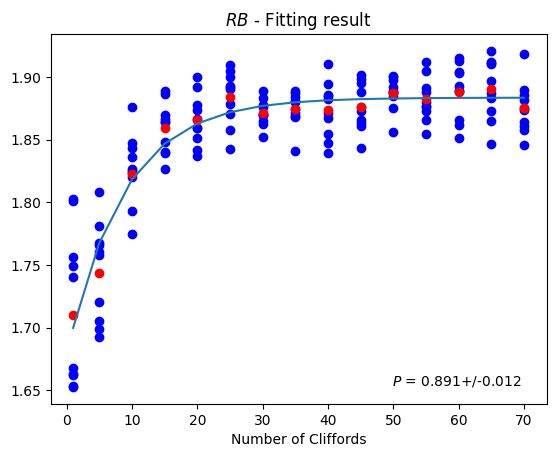

In [32]:
fig, ax = plt.subplots()
plt.ticklabel_format(style = 'sci', scilimits = (-3, 3))
ax.set_title('$RB$ - Fitting result')
ax.set_xlabel('Number of Cliffords')
for trace in z:
    ax.plot(x,np.angle(trace), 'bo')
ax.plot(x,y,'ro',x,y+o1.residual)
textstr = \
    f"$P$ = {o1.uvars['alpha']:.3f}"
    # $R^2$ = {r_squared:.3f}"
ax.text(0.95, 0.08, textstr, transform = ax.transAxes, va = 'top', ha = 'right')

In [30]:
p = o1.uvars['alpha']

In [39]:
pc = o1.uvars['alpha']

In [42]:
gate_fidelity(p,pc)

0.9841070553548519+/-0.007894551404769167

In [ ]:
x = np.linspace(2,101,101)
a = 0.88
y = a**x+0.2*(x-1)*a**(x-2)
plt.plot(x,y)